# Data Exploration 1 - Assignment

## Imports and Connection

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from sqlalchemy import create_engine
import warnings
sns.set(style="whitegrid")

warnings.filterwarnings('ignore')

C:\Users\sebar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing one query
engine.dispose()

In [3]:
# Making column headers lowercase for ease of reference

education_df.columns = map(str.lower, education_df.columns)

education_df.head()

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

3. In your chosen state, which of the lessons are the students more successful, math or reading?

4. What are the distributions of the math and reading scores in the sample?

5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [4]:
education_df3 = education_df.copy()

## Handling missing values
#### Imputing values using interpolation (since the data deals with time)

In [5]:
fill_list = [
    'enroll',
    'total_revenue',
    'federal_revenue',
    'state_revenue',
    'local_revenue',
    'total_expenditure',
    'instruction_expenditure',
    'support_services_expenditure',
    'other_expenditure',
    'capital_outlay_expenditure',
    'grades_pk_g',
    'grades_kg_g',
    'grades_4_g',
    'grades_8_g',
    'grades_12_g',
    'grades_9_12_g',
    'grades_all_g',  
]

states = education_df3['state'].unique()

for state in states:
    education_df3.loc[education_df3['state'] == state, fill_list] = education_df3.loc[education_df3['state'] == state, fill_list].interpolate()

# dropping null values
education_df3.dropna(inplace=True)

#### Confirming missing values were dropped

In [6]:
education_df3.isnull().sum()/education_df3.isnull().count()

primary_key                     0.0
state                           0.0
year                            0.0
enroll                          0.0
total_revenue                   0.0
federal_revenue                 0.0
state_revenue                   0.0
local_revenue                   0.0
total_expenditure               0.0
instruction_expenditure         0.0
support_services_expenditure    0.0
other_expenditure               0.0
capital_outlay_expenditure      0.0
grades_pk_g                     0.0
grades_kg_g                     0.0
grades_4_g                      0.0
grades_8_g                      0.0
grades_12_g                     0.0
grades_1_8_g                    0.0
grades_9_12_g                   0.0
grades_all_g                    0.0
avg_math_4_score                0.0
avg_math_8_score                0.0
avg_reading_4_score             0.0
avg_reading_8_score             0.0
dtype: float64

## Descriptive Statistics

In [32]:
education_df3.describe(include='all')

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
count,415,415,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,4.150000e+02,...,415.000000,415.000000,415.000000,4.150000e+02,4.150000e+02,4.150000e+02,415.000000,415.000000,415.000000,415.000000
unique,414,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.542169,9.435114e+05,1.050078e+07,9.452970e+05,4.861435e+06,4.694044e+06,1.060764e+07,5.483496e+06,...,72305.715663,72921.934940,64247.127711,5.827269e+05,2.858815e+05,8.910099e+05,236.627931,279.547505,219.313624,263.563558
std,NaN,NaN,5.263816,1.120863e+06,1.308047e+07,1.325607e+06,6.150820e+06,6.082528e+06,1.332400e+07,6.988600e+06,...,86175.549811,85813.359479,76734.979844,6.919342e+05,3.396827e+05,1.057819e+06,8.992015,9.599459,7.583719,6.935179
min,NaN,NaN,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,NaN,NaN,2003.000000,2.795105e+05,2.672062e+06,2.594065e+05,1.445588e+06,9.448265e+05,2.624235e+06,1.404482e+06,...,20499.500000,20926.500000,18536.500000,1.666610e+05,8.207900e+04,2.598385e+05,231.945184,274.367612,214.914848,259.312874
50%,NaN,NaN,2007.000000,6.651090e+05,6.077498e+06,5.353560e+05,2.966981e+06,2.385143e+06,6.184819e+06,3.168745e+06,...,50899.000000,50186.000000,41270.000000,4.058170e+05,1.866620e+05,6.249790e+05,238.292839,281.407120,220.829771,265.050858
75%,NaN,NaN,2011.000000,1.017251e+06,1.196548e+07,1.019472e+06,5.972396e+06,5.334070e+06,1.150164e+07,6.006730e+06,...,79410.000000,80916.500000,74850.500000,6.391890e+05,3.217070e+05,9.700250e+05,242.640565,286.086248,224.467909,268.199020


- There are three entries for Virginia in 2008, which are most likely duplicates.
- Average total revenue is less that average total expenditure, which means that states run budget deficits on average.
- Minimum state revenue was zero, which seems strange.
- On average, local revenue was higher than federal revenue, but lower than state revenue.

## Plotting state revenue data
#### For Massachusetts

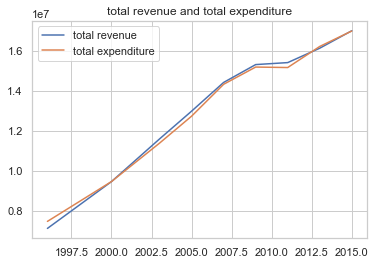

In [7]:
plt.plot(education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'year'],
        education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'total_revenue'], label='total revenue')

plt.plot(education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'year'],
        education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'total_expenditure'], label='total expenditure')

plt.title('total revenue and total expenditure')
plt.legend()
plt.show()

The dip in total state revenue and expenditure starting around 2009 was due to the recession. Tens of thousands of teachers were losing their jobs at that time, because revenue was not enough to cover their wages: https://www.nytimes.com/2010/04/21/education/21teachers.html

## Evaluating student success per course studied

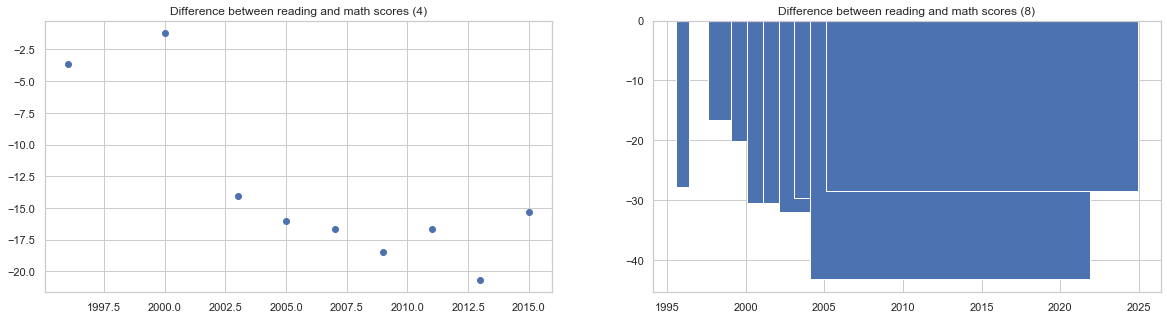


Difference between reading and math scores (4)
230     1996
437     2000
594     2003
697     2005
801     2007
909     2009
1014    2011
1118    2013
1220    2015
Name: year, dtype: int64 230     -3.656542
437     -1.211203
594    -14.060268
697    -16.057610
801    -16.676858
909    -18.505327
1014   -16.622589
1118   -20.660629
1220   -15.290354
dtype: float64

Difference between reading and math scores (8)
230     1996
437     2000
594     2003
697     2005
801     2007
909     2009
1014    2011
1118    2013
1220    2015
Name: year, dtype: int64 230    -27.875887
437    -16.623476
594    -20.111726
697    -30.499855
801    -30.472625
909    -32.054827
1014   -29.678468
1118   -43.216992
1220   -28.517335
dtype: float64


In [10]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.scatter(education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'year'], education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'avg_reading_4_score'] - education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'avg_math_4_score'])

plt.title('Difference between reading and math scores (4)')

plt.subplot(1,2,2)
plt.bar(education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'year'], education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'avg_reading_8_score'] - education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'avg_math_8_score'])

plt.title('Difference between reading and math scores (8)')

plt.show()
print()
print('Difference between reading and math scores (4)')
print(education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'year'], education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'avg_reading_4_score'] - education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'avg_math_4_score'])
print()
print('Difference between reading and math scores (8)')
print(education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'year'], education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'avg_reading_8_score'] - education_df3.loc[education_df3.state == 'MASSACHUSETTS', 'avg_math_8_score']) 

In Massachusetts, students are most successful in math and reading.

## Math and reading distributions

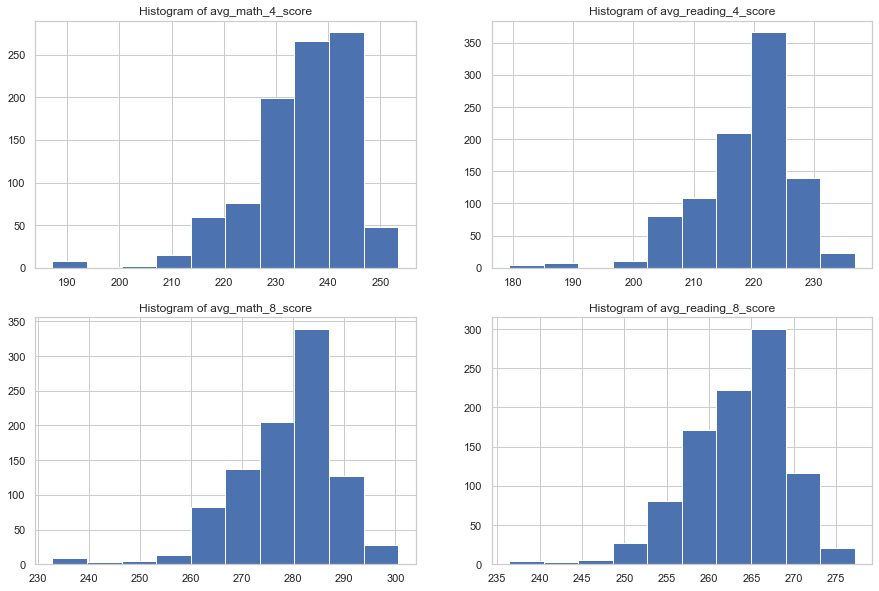

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.hist(education_df2.avg_math_4_score.dropna())
plt.title('Histogram of {}'.format('avg_math_4_score'))

plt.subplot(2,2,2)
plt.hist(education_df2.avg_reading_4_score.dropna())
plt.title('Histogram of {}'.format('avg_reading_4_score'))

plt.subplot(2,2,3)
plt.hist(education_df2.avg_math_8_score.dropna())
plt.title('Histogram of {}'.format('avg_math_8_score'))

plt.subplot(2,2,4)
plt.hist(education_df2.avg_reading_8_score.dropna())
plt.title('Histogram of {}'.format('avg_reading_8_score'))

plt.show()

#### Too many missing values for math and reading scores. Filling out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [11]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

In [12]:
education_df.columns = map(str.lower, education_df.columns)

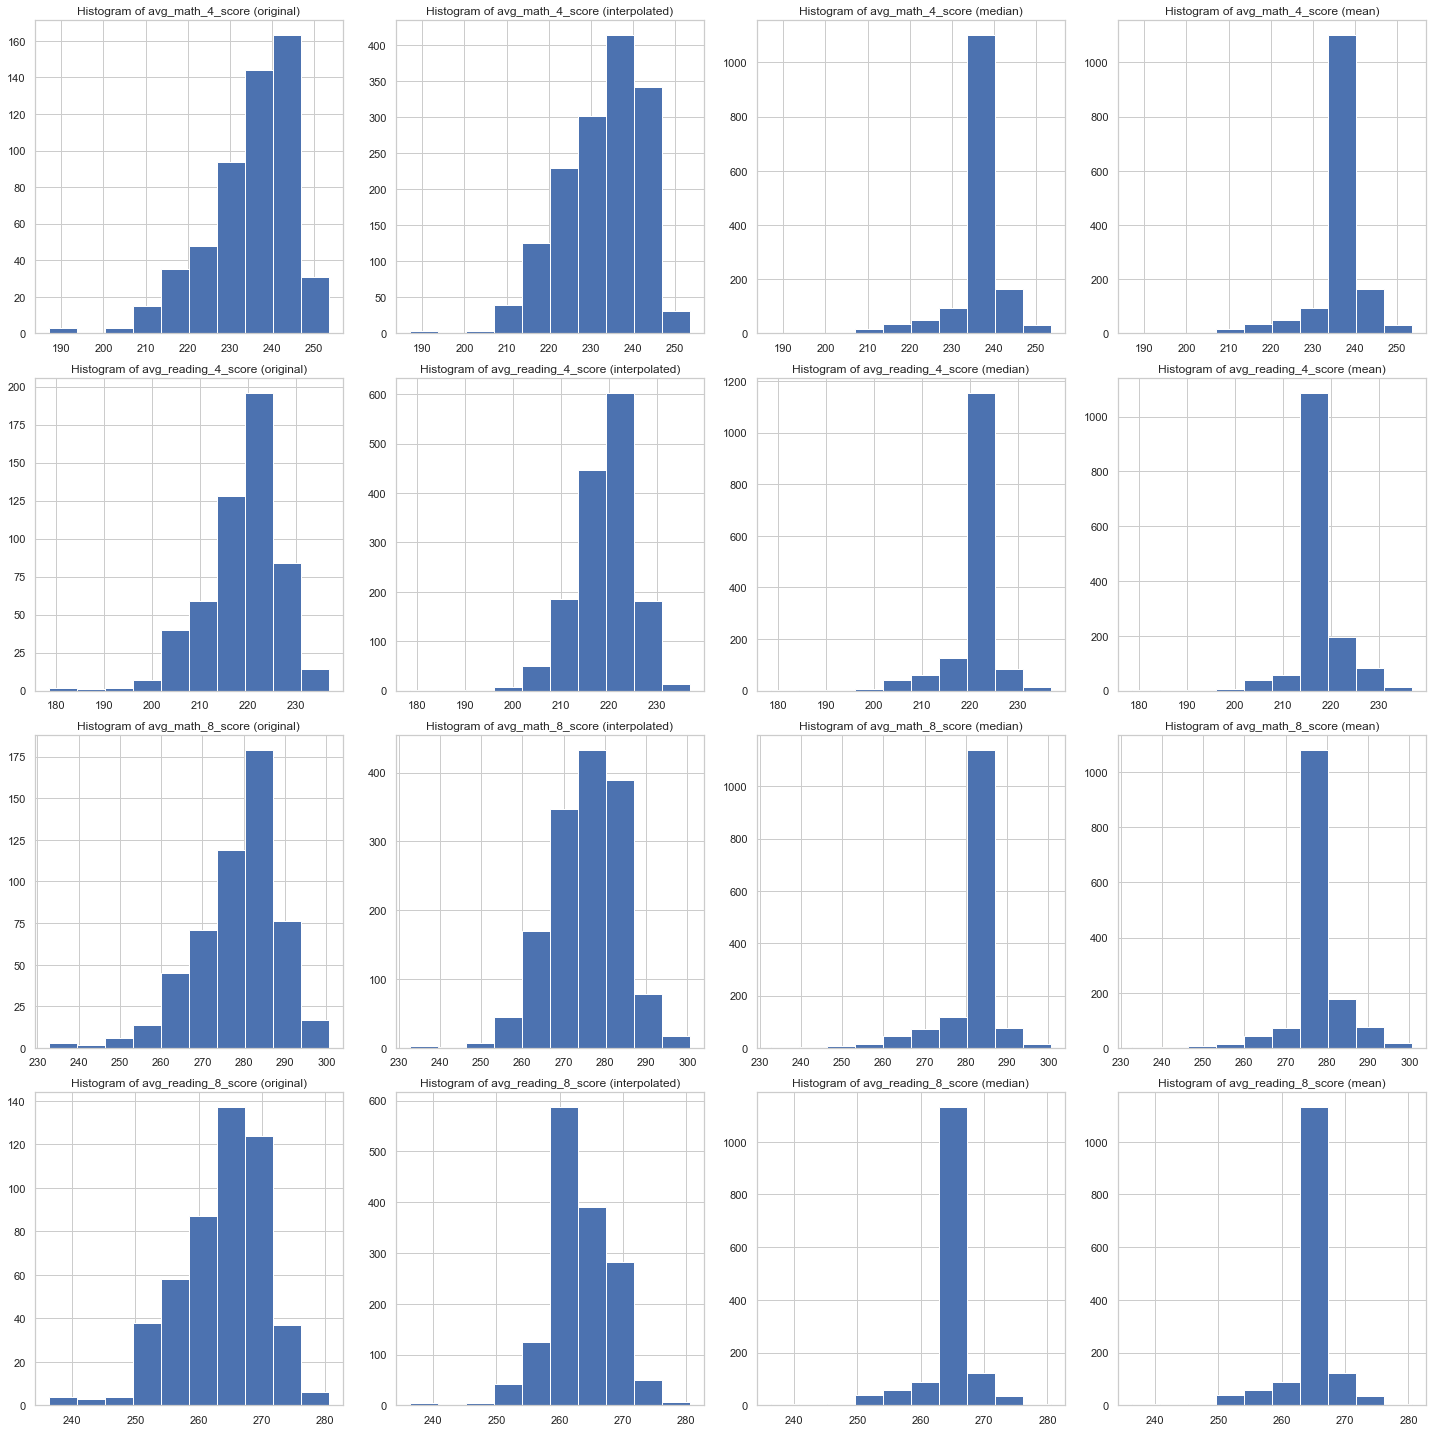

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(education_df.avg_math_4_score.dropna())
plt.title('Histogram of {} (original)'.format('avg_math_4_score'))

plt.subplot(4,4,2)
plt.hist(education_df.avg_math_4_score.interpolate())
plt.title('Histogram of {} (interpolated)'.format('avg_math_4_score'))

plt.subplot(4,4,3)
plt.hist(education_df.avg_math_4_score.fillna(
education_df.avg_math_4_score.median()))
plt.title('Histogram of {} (median)'.format('avg_math_4_score'))

plt.subplot(4,4,4)
plt.hist(education_df.avg_math_4_score.fillna(
education_df.avg_math_4_score.mean()))
plt.title('Histogram of {} (mean)'.format('avg_math_4_score'))


plt.subplot(4,4,5)
plt.hist(education_df.avg_reading_4_score.dropna())
plt.title('Histogram of {} (original)'.format('avg_reading_4_score'))

plt.subplot(4,4,6)
plt.hist(education_df.avg_reading_4_score.interpolate())
plt.title('Histogram of {} (interpolated)'.format('avg_reading_4_score'))

plt.subplot(4,4,7)
plt.hist(education_df.avg_reading_4_score.fillna(
education_df.avg_reading_4_score.median()))
plt.title('Histogram of {} (median)'.format('avg_reading_4_score'))

plt.subplot(4,4,8)
plt.hist(education_df.avg_reading_4_score.fillna(
education_df.avg_reading_4_score.mean()))
plt.title('Histogram of {} (mean)'.format('avg_reading_4_score'))


plt.subplot(4,4,9)
plt.hist(education_df.avg_math_8_score.dropna())
plt.title('Histogram of {} (original)'.format('avg_math_8_score'))

plt.subplot(4,4,10)
plt.hist(education_df.avg_math_8_score.interpolate())
plt.title('Histogram of {} (interpolated)'.format('avg_math_8_score'))

plt.subplot(4,4,11)
plt.hist(education_df.avg_math_8_score.fillna(
education_df.avg_math_8_score.median()))
plt.title('Histogram of {} (median)'.format('avg_math_8_score'))

plt.subplot(4,4,12)
plt.hist(education_df.avg_math_8_score.fillna(
education_df.avg_math_8_score.mean()))
plt.title('Histogram of {} (mean)'.format('avg_math_8_score'))


plt.subplot(4,4,13)
plt.hist(education_df.avg_reading_8_score.dropna())
plt.title('Histogram of {} (original)'.format('avg_reading_8_score'))

plt.subplot(4,4,14)
plt.hist(education_df.avg_reading_8_score.interpolate())
plt.title('Histogram of {} (interpolated)'.format('avg_reading_8_score'))

plt.subplot(4,4,15)
plt.hist(education_df.avg_reading_8_score.fillna(
education_df.avg_reading_8_score.median()))
plt.title('Histogram of {} (median)'.format('avg_reading_8_score'))

plt.subplot(4,4,16)
plt.hist(education_df.avg_reading_8_score.fillna(
education_df.avg_reading_8_score.mean()))
plt.title('Histogram of {} (mean)'.format('avg_reading_8_score'))

plt.tight_layout()
plt.show()

The distribution of the variables is significantly affected by our techniques for filling in missing values. In particular, filling with mean or median has the highest distorting effect.

In the case of these variables, I would choose between keeping them after running them through the interpolation technqiue, or discarding them altogether.